# 0. 기본 정보
* 코드 작성자: 여서연
* 코드 작성일: 2024-04-02
* 데이터 분석 목적: 토이프로젝트 대상 적합성 판단
* 데이터 출처: [Water quality](https://www.kaggle.com/datasets/mssmartypants/water-quality)

# 1. 기초 설정

In [1]:
# 사용한 라이브러리

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# 열 중간 잘리지 않게 설정

pd.set_option('display.max_columns', None)

In [3]:
# 데이터 불러오기

data_origin = pd.read_csv('../../data/waterQuality1.csv')
data = data_origin.copy()

# 2. 데이터 특성 파악 및 전처리

## 2-1. 기본 특성

In [4]:
# 출력 예시 확인
data.sample(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
999,3.56,21.63,0.030,2.52,0.009,5.02,0.79,1.49,0.65,0.00,0.000,0.160,13.24,1.21,0.003,37.90,6.82,0.02,0.34,0.01,0
2960,0.02,1.13,0.010,1.79,0.001,0.46,0.58,0.24,0.05,0.35,0.002,0.102,15.03,1.57,0.007,28.11,4.04,0.03,0.25,0.03,0
4607,0.00,25.96,0.010,0.48,0.020,0.06,0.04,0.10,1.10,0.00,0.001,0.036,17.78,0.12,0.001,0.48,3.23,0.02,0.01,0.00,0
7448,0.08,18.98,0.070,0.94,0.100,0.06,0.08,0.44,0.67,0.59,0.590,0.042,15.39,1.82,0.006,2.47,0.16,0.05,0.03,0.02,0
499,2.06,15.16,0.030,3.04,0.007,1.78,0.48,0.75,0.09,0.84,0.840,0.183,11.36,1.98,0.001,31.24,3.60,0.03,0.42,0.05,1
312,2.94,24.44,0.030,1.08,0.004,2.20,0.88,0.13,0.06,0.58,0.580,0.035,2.64,1.08,0.007,0.34,1.63,0.01,0.01,0.06,1
744,4.75,14.91,0.040,2.40,0.001,6.36,0.35,1.48,0.54,0.00,0.000,0.126,11.21,1.22,0.007,9.56,7.90,0.02,0.17,0.06,1
397,1.99,7.55,0.040,1.53,0.001,1.68,0.35,0.04,1.30,0.03,0.007,0.110,1.08,1.09,0.008,44.54,3.11,0.07,0.13,0.04,1
4331,0.02,9.41,0.070,0.53,0.020,0.12,0.05,0.05,0.77,0.00,0.770,0.019,8.61,0.73,0.000,3.63,0.15,0.03,0.08,0.00,0
49,0.30,0.44,0.001,2.50,0.007,6.11,0.35,1.79,0.89,0.67,0.670,0.136,14.27,1.73,0.006,16.99,4.12,0.09,0.42,0.01,1


In [5]:
# 컬럼 리스트
data_cols = list(data.columns)
data_cols

['aluminium',
 'ammonia',
 'arsenic',
 'barium',
 'cadmium',
 'chloramine',
 'chromium',
 'copper',
 'flouride',
 'bacteria',
 'viruses',
 'lead',
 'nitrates',
 'nitrites',
 'mercury',
 'perchlorate',
 'radium',
 'selenium',
 'silver',
 'uranium',
 'is_safe']

In [6]:
# 변수 타입
data_types = data.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: ['ammonia', 'is_safe']

양적 변수: ['aluminium', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']


## 2-2. 질적 변수

In [7]:
data['ammonia'][0]

'9.08'

In [8]:
# 고유값
data['is_safe'].value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

## 2-3. 결측치

In [9]:
# 결측치 수와 비율 계산
missing_count = data.isnull().sum()
missing_ratio = round(missing_count / len(data) * 100, 2)

# 결측치 수와 비율 출력
missing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(missing_info)

             결측치 수  결측치 비율 (%)
aluminium        0         0.0
ammonia          0         0.0
arsenic          0         0.0
barium           0         0.0
cadmium          0         0.0
chloramine       0         0.0
chromium         0         0.0
copper           0         0.0
flouride         0         0.0
bacteria         0         0.0
viruses          0         0.0
lead             0         0.0
nitrates         0         0.0
nitrites         0         0.0
mercury          0         0.0
perchlorate      0         0.0
radium           0         0.0
selenium         0         0.0
silver           0         0.0
uranium          0         0.0
is_safe          0         0.0


In [10]:
# 전체 결측치를 한번에 제거해도 되는지 확인
cleaned_data = data.dropna()

print(f"결측치 제거 전 행의 수: {data.shape[0]}")
print(f"결측치 제거 후 행의 수: {cleaned_data.shape[0]}")

결측치 제거 전 행의 수: 7999
결측치 제거 후 행의 수: 7999


## 2-4. 양적변수

In [11]:
# 기술통계량
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0,0.040,0.070,0.280,5.05
arsenic,7999.0,0.161445,0.252590,0.0,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.0,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.0,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.0,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.0,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.0,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.0,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.0,0.000,0.220,0.610,1.00
viruses,7999.0,0.328583,0.378096,0.0,0.002,0.008,0.700,1.00


In [12]:
# subplot 행렬 차원 계산
hist_lists = len(quant_vari)
hist_rows = int(hist_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
hist_cols = (hist_lists + hist_rows - 1) // hist_rows  # 가장 가까운 값을 사용하여 열 개수 계산

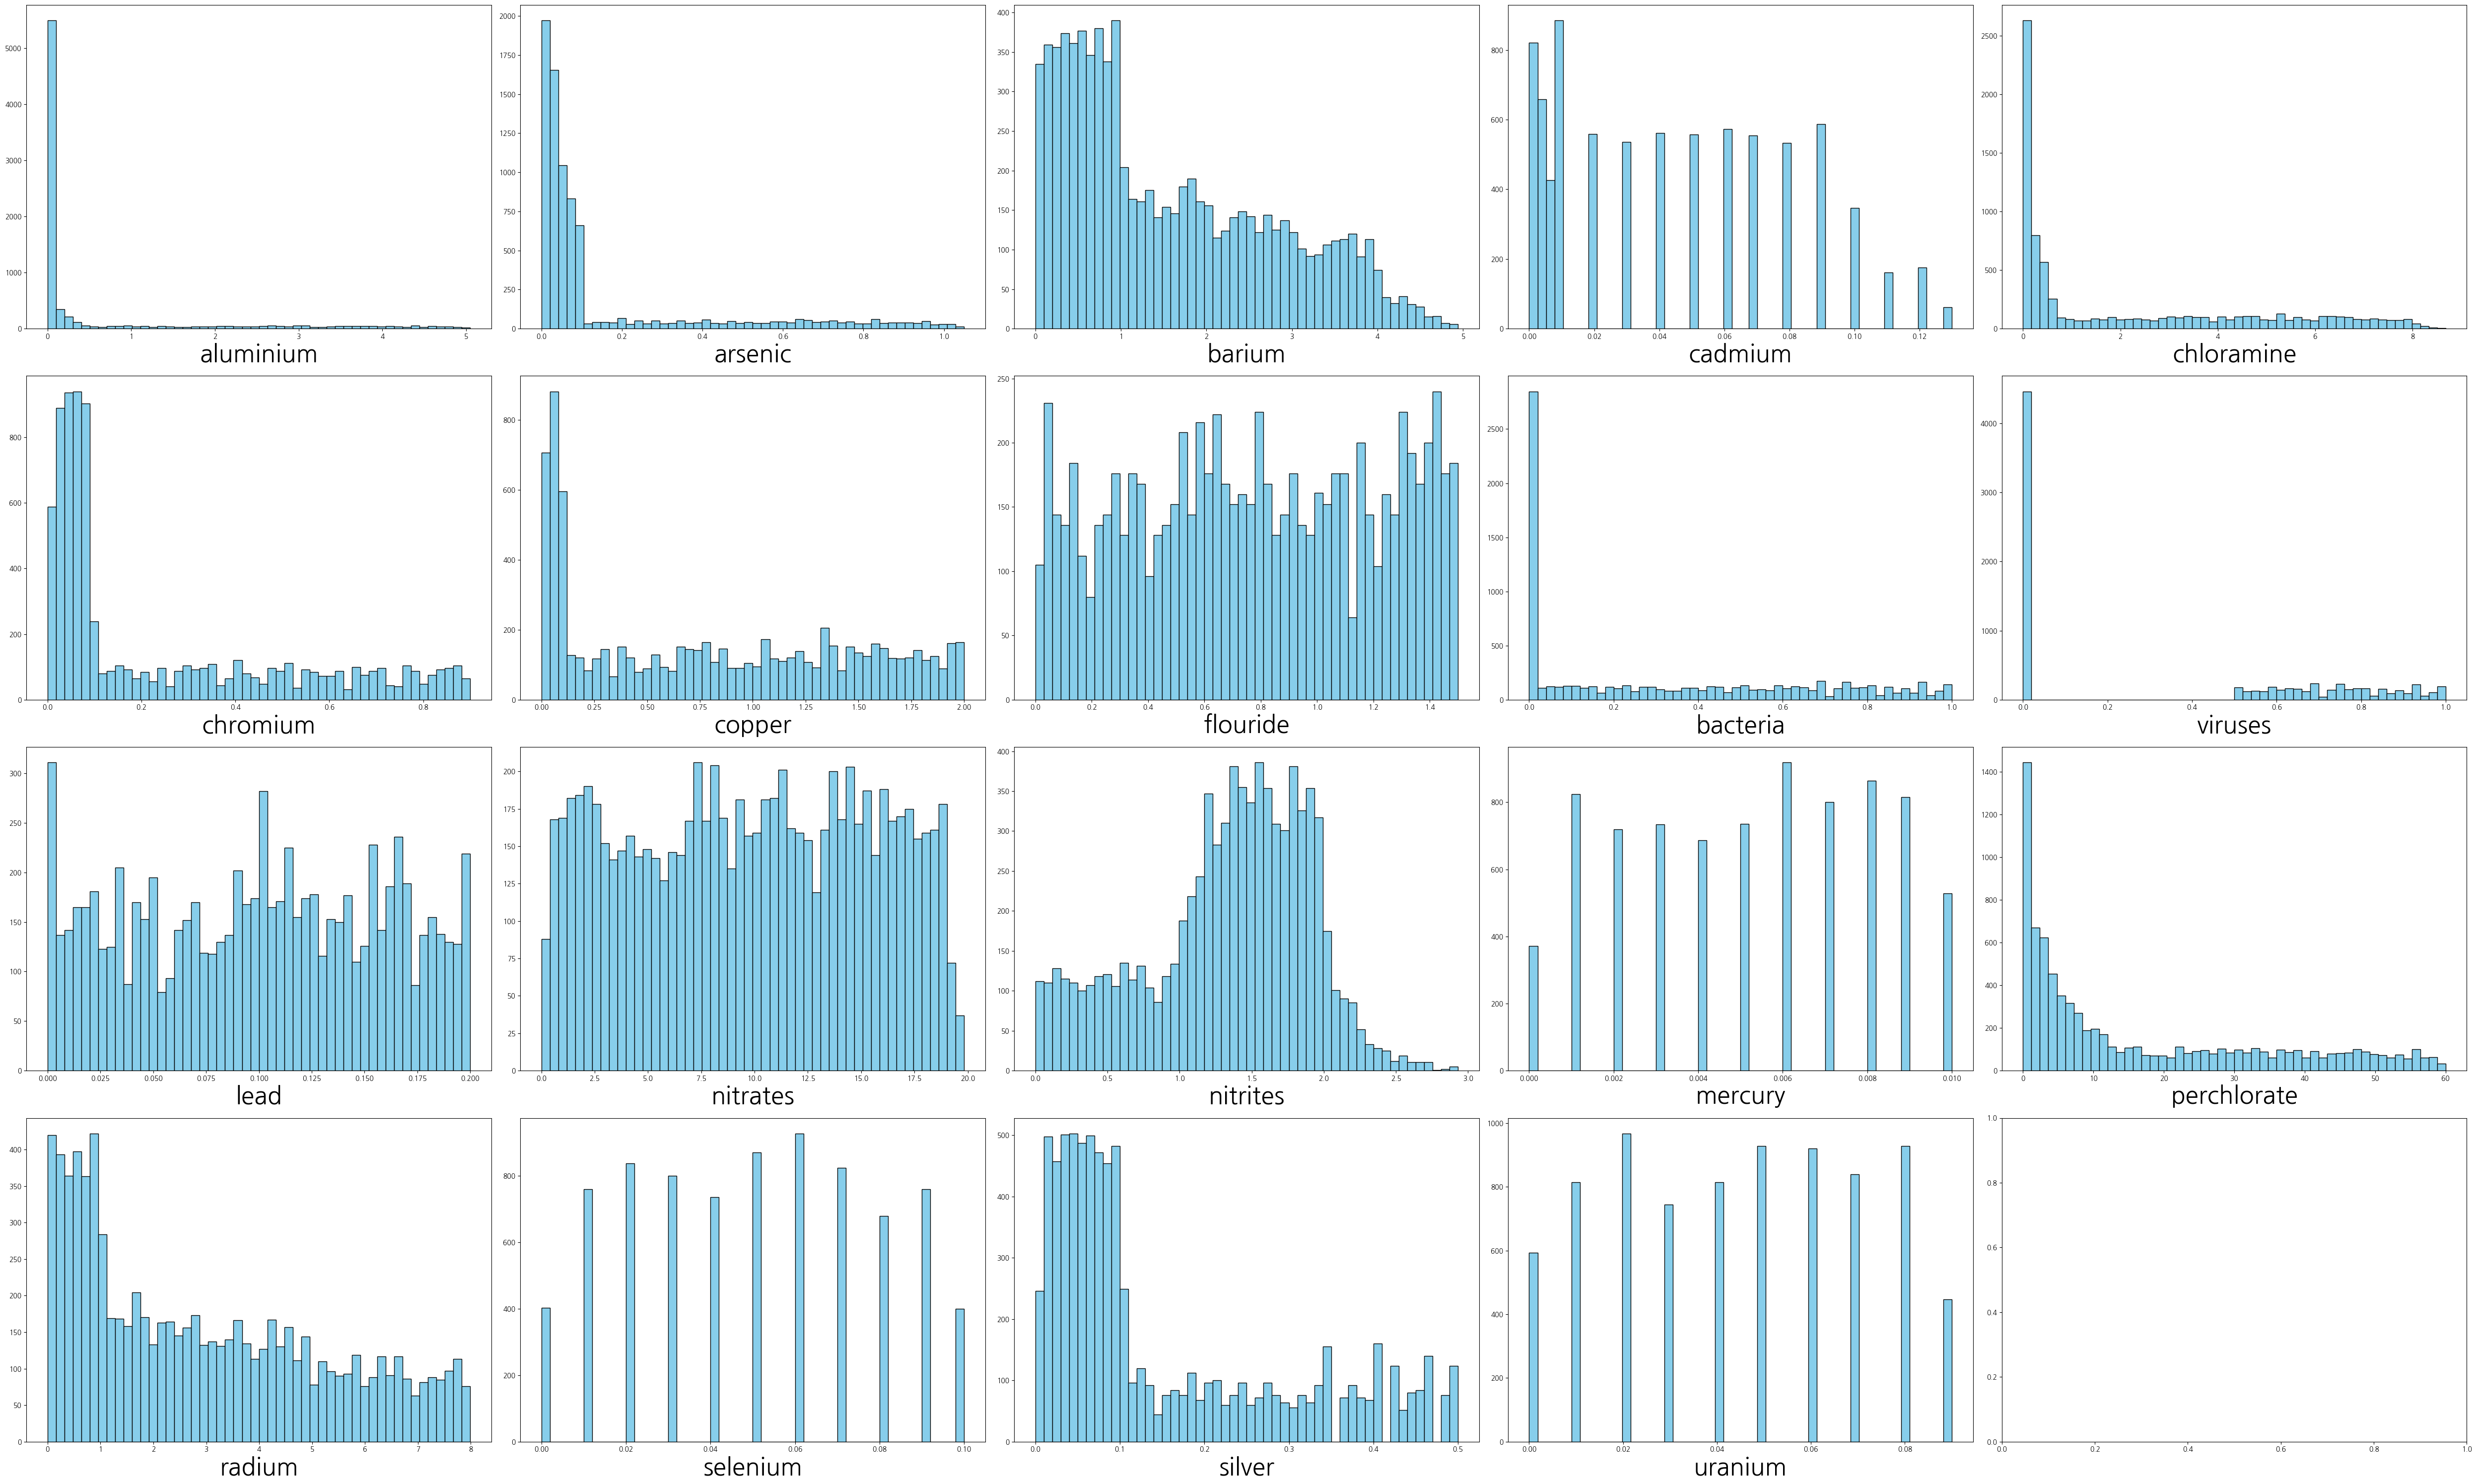

In [13]:
# 히스토그램
fig, axes = plt.subplots(hist_rows, hist_cols, figsize=(50, 30)) #plot 생성

for i, col in enumerate(quant_vari):
    row_idx = i // hist_cols
    col_idx = i % hist_cols

    ax = axes[row_idx, col_idx] if hist_rows > 1 else axes[col_idx]
    ax.hist(data[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_xlabel(col, fontsize=35)

plt.tight_layout()
plt.show()

## 2-5. 이상치 점검

### (1) 함수 설정
**GetOutlier**: IQR을 통해 이상치를 추출<br>
* df: csv파일 등에서 불러온 데이터 프레임<br>
* col: 사용하고자 하는 <u>수치형</u> 컬럼 이름<br>
* weight: 가중치, 기본값은 1.5

In [14]:
def GetOutlier(df, col, weight=1.5):
    outlier_list = []
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    for i in df[col]:
        if i > Q3 + weight*IQR :
            outlier_list.append(i)
        if i < Q1 - weight*IQR :
            outlier_list.append(i)

    cnt_outlier = len(outlier_list)
    uniq_outlier = list(set(outlier_list)) #고유값만 출력

    if len(outlier_list) == 0:
        print(col, '이상치 없음')

    else:
        print(col, '이상치:', np.sort(uniq_outlier))

### (2) 이상치 시각화

In [15]:
# list 형식
for numeric in quant_vari:
    GetOutlier(data, numeric)

aluminium 이상치: [0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06
 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2
 1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.32 1.33 1.34 1.35
 1.36 1.37 1.38 1.39 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.48 1.49 1.5
 1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.65
 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79
 1.8  1.81 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93
 1.94 1.95 1.96 1.97 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05 2.06 2.07
 2.08 2.09 2.1  2.11 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21
 2.22 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35
 2.36 2.37 2.38 2.39 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48 2.5
 2.51 2.52 2.53 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63

In [16]:
# subplot 행렬 차원 계산
target_cols = quant_vari[:2] + ['nitrites']
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  # 가장 가까운 값을 사용하여 열 개수 계산

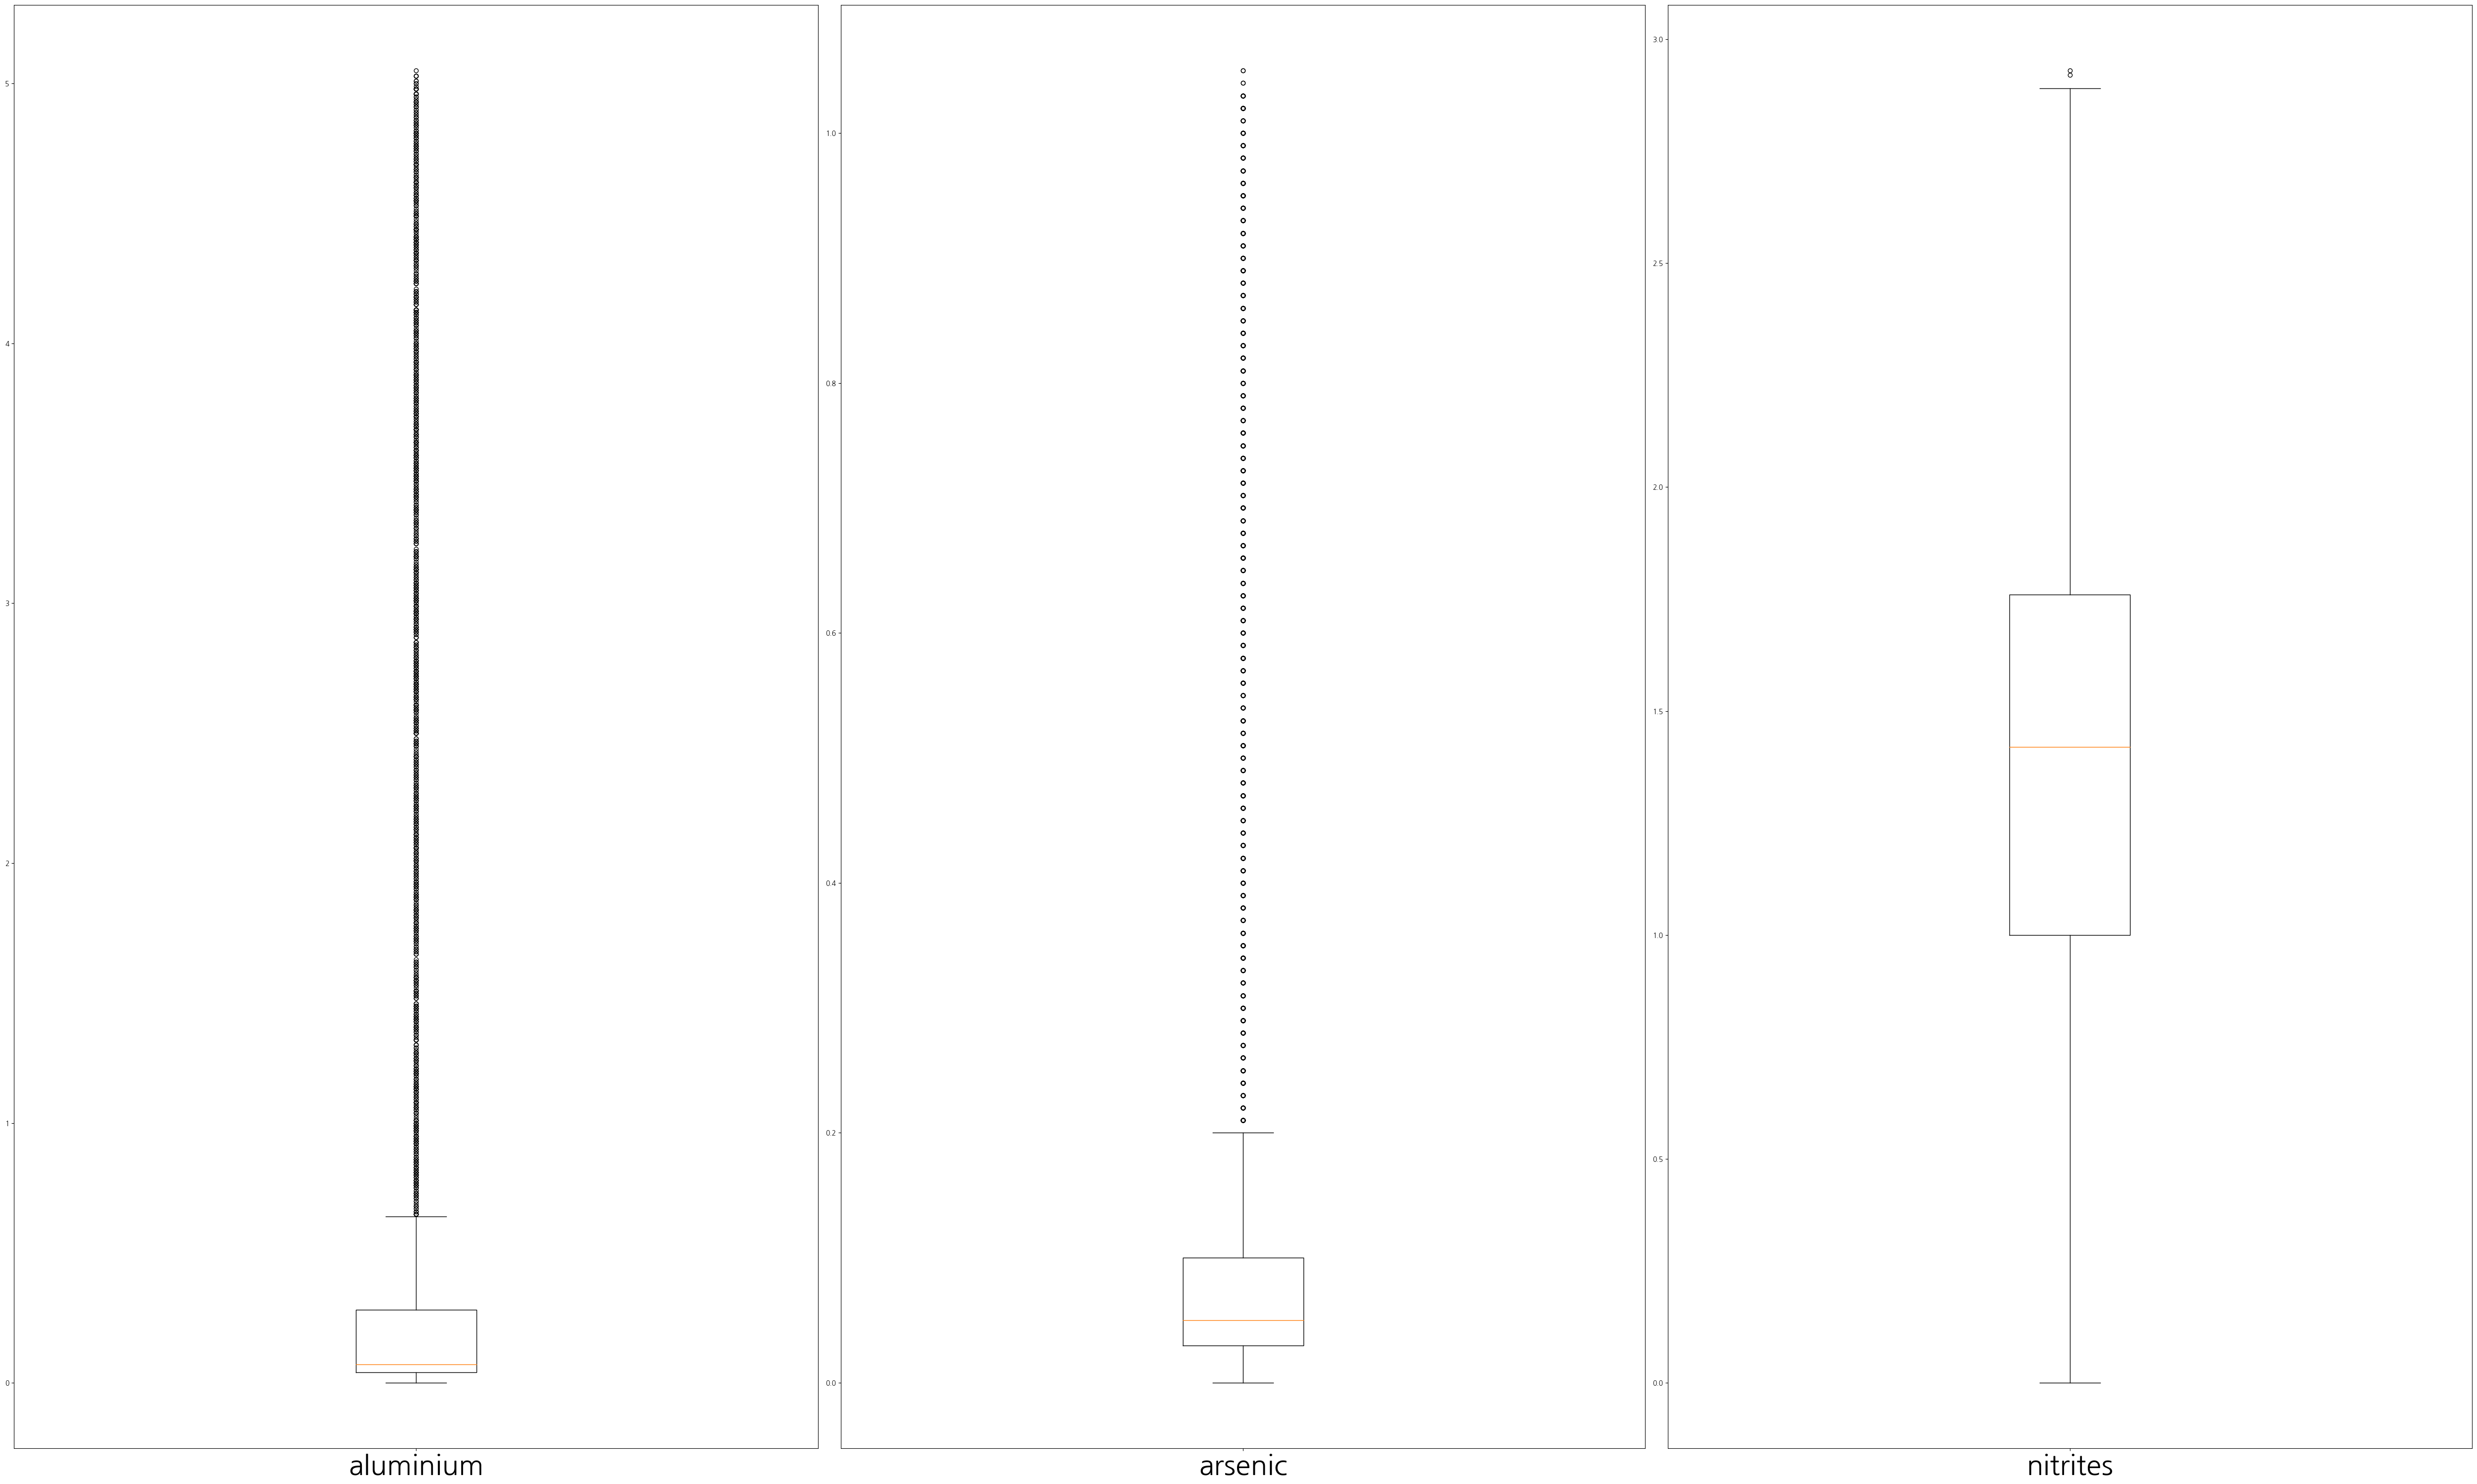

In [17]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(50, 30)) #plot 생성

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(data[col])
    ax.set_xticklabels([col], fontsize=40)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

# 3. 가설 검증 및 연구

## 3-1. 가설 또는 연구 주제 설정
---
